# RandomForest

# Import Package and Data

## Import Package

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import numpy as np
import pandas as pd
import json
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

sns.set()

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from __future__ import print_function
from scipy.signal import savgol_filter

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from scipy.stats import spearmanr, pearsonr
from sklearn.svm import SVR
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

## Import Data

In [2]:

a=pd.read_csv('c://users//kuerban//Desktop/ML/Data/Unit_sa.csv')
b=pd.read_csv('c://users//kuerban//Desktop/ML/Data/Unit_b.csv')
c=pd.read_csv('c://users//kuerban//Desktop/ML/Data/Unit_c.csv')



xa=a[['pn0.3','pn0.5','pn1.0','pn2.5','pn5','pn10','pm1.0','pm2.5','pm10','hw2.5','hw10','shinyei','samyoung']]
xb=b[['pn0.3','pn0.5','pn1.0','pn2.5','pn5','pn10','pm1.0','pm2.5','pm10','hw2.5','hw10','shinyei','samyoung']]
xc=c[['pn0.3','pn0.5','pn1.0','pn2.5','pn5','pn10','pm1.0','pm2.5','pm10','hw2.5','hw10','shinyei','samyoung']]



ya=a['PM']
yb=b['PM']
yc=c['PM']



## Train and Predict

In [3]:


########################################################################
features = xa
targets = ya
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0)
rf.fit(X_train, y_train)


apa= rf.predict(xa)
apb= rf.predict(xb)
apc= rf.predict(xc)



########################################################################
features = xb
targets = yb
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0)
rf.fit(X_train, y_train)


bpa= rf.predict(xa)
bpb= rf.predict(xb)
bpc= rf.predict(xc)


########################################################################
features = xc
targets = yc
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

cpa= rf.predict(xa)
cpb= rf.predict(xb)
cpc= rf.predict(xc)





C:\Users\kuerban\New folder\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\kuerban\New folder\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\kuerban\New folder\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
########################################################################


apa = savgol_filter(apa, 51, 3)
apb = savgol_filter(apb, 51, 3)
apc = savgol_filter(apc, 51, 3)


apa[apa<0]=0
apb[apb<0]=0
apc[apc<0]=0



########################################################################

bpa = savgol_filter(bpa, 51, 3)
bpb = savgol_filter(bpb, 51, 3)
bpc = savgol_filter(bpc, 51, 3)


bpa[bpa<0]=0
bpb[bpb<0]=0
bpc[bpc<0]=0

########################################################################

cpa = savgol_filter(cpa, 51, 3)
cpb = savgol_filter(cpb, 51, 3)
cpc = savgol_filter(cpc, 51, 3)


cpa[cpa<0]=0
cpb[cpb<0]=0
cpc[cpc<0]=0


########################################################################
# Smoothing CPC Data and make sure all of them are positive


ya = savgol_filter(ya, 51, 3)
yb = savgol_filter(yb, 51, 3)
yc = savgol_filter(yc, 51, 3)


ya[ya<0]=0
yb[yb<0]=0
yc[yc<0]=0



In [5]:
print('########################################################################')
apa_test_score = r2_score(ya, apa)
apb_test_score = r2_score(yb, apb)
apc_test_score = r2_score(yc, apc)

print('aa:',apa_test_score)
print('ab:',apb_test_score)
print('ac:',apc_test_score)
print('########################################################################')





bpa_test_score = r2_score(ya, bpa)
bpb_test_score = r2_score(yb, bpb)
bpc_test_score = r2_score(yc, bpc)

print('ba:',bpa_test_score)
print('bb:',bpb_test_score)
print('bc:',bpc_test_score)
print('########################################################################')


cpa_test_score = r2_score(ya, cpa)
cpb_test_score = r2_score(yb, cpb)
cpc_test_score = r2_score(yc, cpc)

print('ca:',cpa_test_score)
print('cb:',cpb_test_score)
print('cc:',cpc_test_score)
print('########################################################################')

########################################################################
aa: 0.9523995212691488
ab: 0.7648695604704685
ac: 0.8059157729053505
########################################################################
ba: 0.6173015684862089
bb: 0.9830687951425464
bc: 0.909504178742972
########################################################################
ca: 0.6961669317219055
cb: 0.8870382410449785
cc: 0.9807133224970789
########################################################################


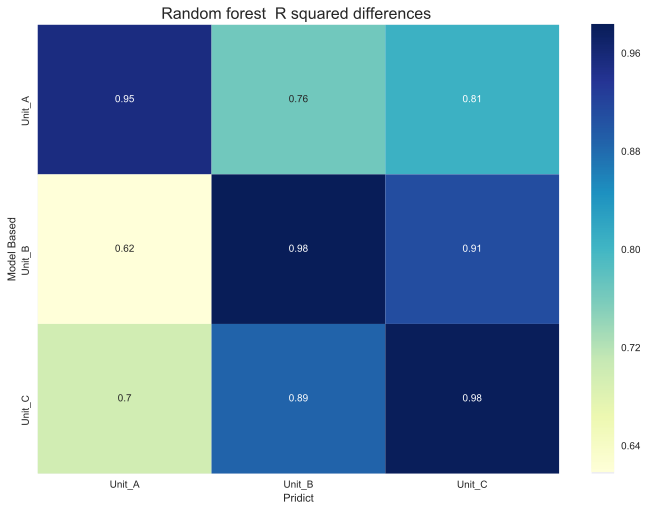

In [6]:
data = { 'Model Based' : [ 'Unit_A','Unit_A','Unit_A',  'Unit_B','Unit_B','Unit_B', 'Unit_C','Unit_C','Unit_C'],  'Pridict' : ['Unit_A','Unit_B','Unit_C','Unit_A','Unit_B','Unit_C','Unit_A','Unit_B','Unit_C'], 'R_squard' : [apa_test_score,apb_test_score,apc_test_score,bpa_test_score,bpb_test_score,bpc_test_score,cpa_test_score,cpb_test_score,cpc_test_score] }
Matrix = pd.DataFrame(data)
Matrix= Matrix.pivot('Model Based', "Pridict", "R_squard")

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.heatmap(Matrix,annot=True,cmap="YlGnBu")
ax.set_title('Random forest  R squared differences ',fontsize=16)
plt.savefig("rr.png", dpi = 900)

In [7]:
print('########################################################################')
apa_test_score = sqrt(mean_squared_error(ya, apa))
apb_test_score = sqrt(mean_squared_error(yb, apb))
apc_test_score = sqrt(mean_squared_error(yc, apc))

print('aa:',apa_test_score)
print('ab:',apb_test_score)
print('ac:',apc_test_score)
print('########################################################################')





bpa_test_score = sqrt(mean_squared_error(ya, bpa))
bpb_test_score =sqrt( mean_squared_error(yb, bpb))
bpc_test_score = sqrt(mean_squared_error(yc, bpc))

print('ba:',bpa_test_score)
print('bb:',bpb_test_score)
print('bc:',bpc_test_score)
print('########################################################################')


cpa_test_score = sqrt(mean_squared_error(ya, cpa))
cpb_test_score =sqrt( mean_squared_error(yb, cpb))
cpc_test_score = sqrt(mean_squared_error(yc, cpc))

print('ca:',cpa_test_score)
print('cb:',cpb_test_score)
print('cc:',cpc_test_score)
print('########################################################################')

########################################################################
aa: 3.3081316546121884
ab: 7.3328266429936475
ac: 6.662114787020252
########################################################################
ba: 9.380056748251082
bb: 1.967709227550356
bc: 4.549160429814903
########################################################################
ca: 8.357851383208095
cb: 5.082562328142566
cc: 2.100127681385235
########################################################################


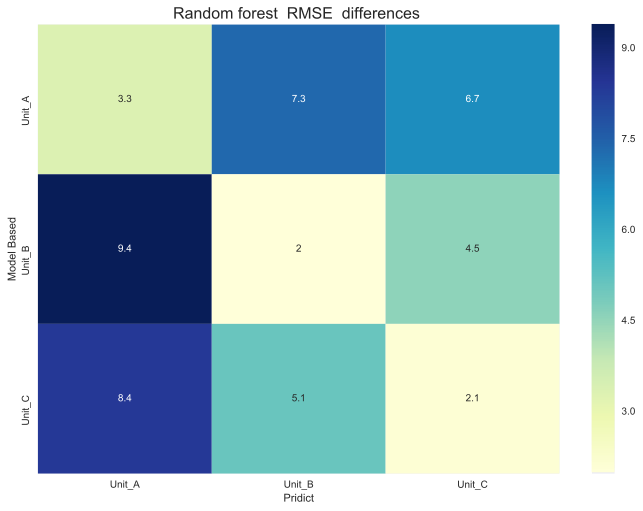

In [8]:
data = { 'Model Based' : [ 'Unit_A','Unit_A','Unit_A',  'Unit_B','Unit_B','Unit_B', 'Unit_C','Unit_C','Unit_C'],  'Pridict' : ['Unit_A','Unit_B','Unit_C','Unit_A','Unit_B','Unit_C','Unit_A','Unit_B','Unit_C'], 'R_squard' : [apa_test_score,apb_test_score,apc_test_score,bpa_test_score,bpb_test_score,bpc_test_score,cpa_test_score,cpb_test_score,cpc_test_score] }
Matrix = pd.DataFrame(data)
Matrix= Matrix.pivot('Model Based', "Pridict", "R_squard")

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.heatmap(Matrix,annot=True,cmap="YlGnBu")
ax.set_title('Random forest  RMSE  differences ',fontsize=16)
plt.savefig("rm.png", dpi = 900)

## Plot

Text(0.5,1,'Traind with Unit_A data and predict other units')

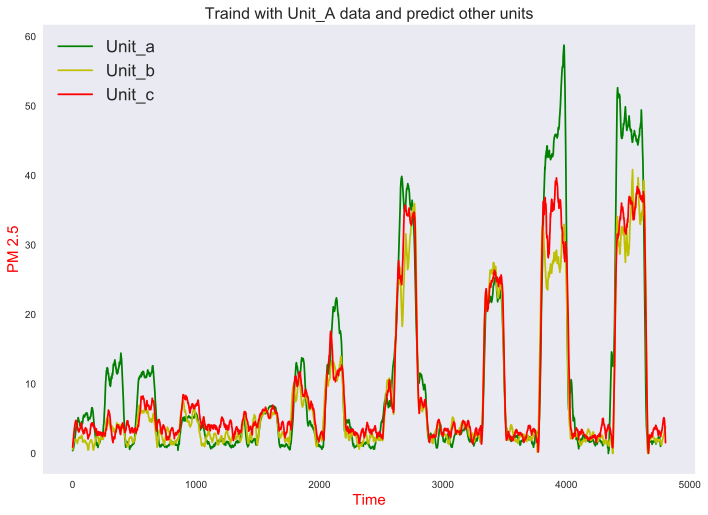

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(a['Number'],apa, 'g-',label='Unit_a')
ax1.plot(b['Number'],apb, 'y-',label='Unit_b')
ax1.plot(b['Number'],apc, 'r-',label='Unit_c')



#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Traind with Unit_A data and predict other units',fontsize=16)

Text(0.5,1,'Traind with Unit_B data and predict other units')

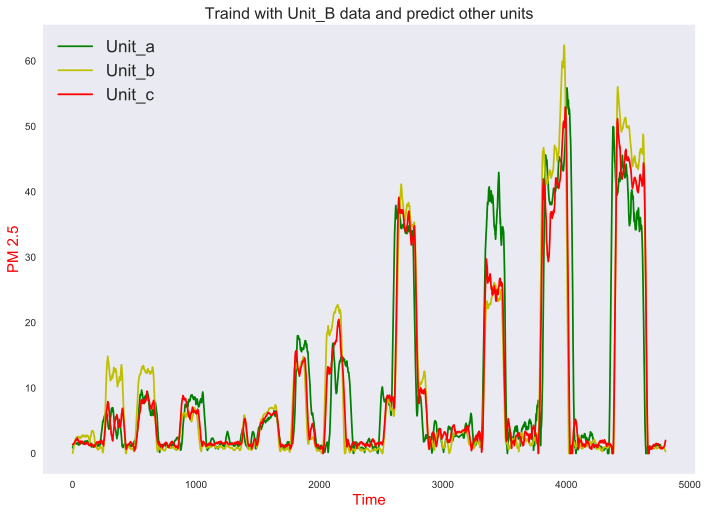

In [10]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(a['Number'],bpa, 'g-',label='Unit_a')
ax1.plot(b['Number'],bpb, 'y-',label='Unit_b')
ax1.plot(b['Number'],bpc, 'r-',label='Unit_c')
#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Traind with Unit_B data and predict other units',fontsize=16)

Text(0.5,1,'Traind with Unit_C data and predict other units')

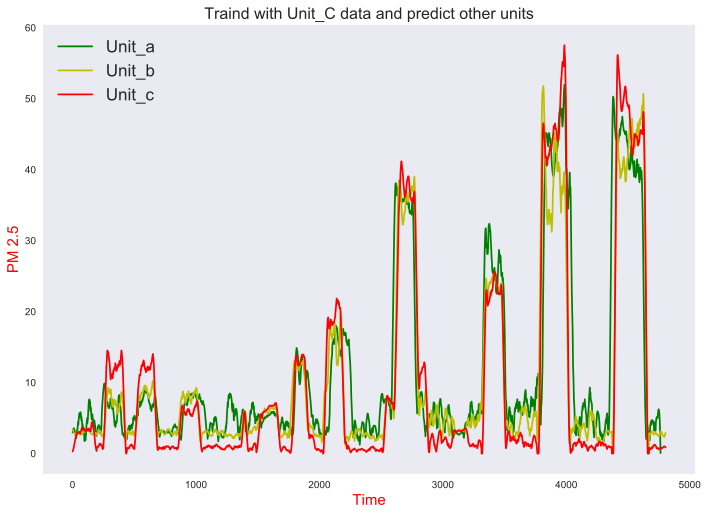

In [11]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(a['Number'],cpa, 'g-',label='Unit_a')
ax1.plot(b['Number'],cpb, 'y-',label='Unit_b')
ax1.plot(b['Number'],cpc, 'r-',label='Unit_c')
#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Traind with Unit_C data and predict other units',fontsize=16)

Text(0.5,1,'Different model preidct Unit_B')

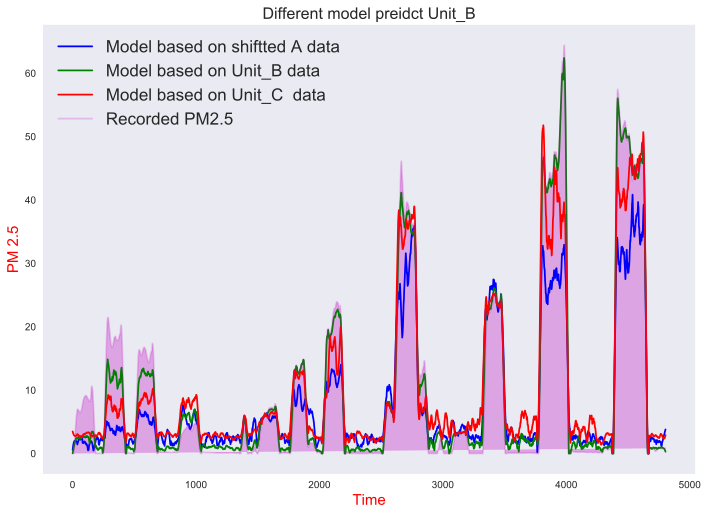

In [12]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(b['Number'],apb, 'b-',label='Model based on shiftted A data')
ax1.plot(b['Number'],bpb, 'g-',label='Model based on Unit_B data')
ax1.plot(b['Number'],cpb, 'r-',label='Model based on Unit_C  data')
ax1.plot(b['Number'],yb, 'm-',alpha=0.2,label='Recorded PM2.5')
ax1.fill(b['Number'], yb, 'm', alpha=0.3)
#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Different model preidct Unit_B',fontsize=16)

Text(0.5,1,'Different model preidct Unit_C')

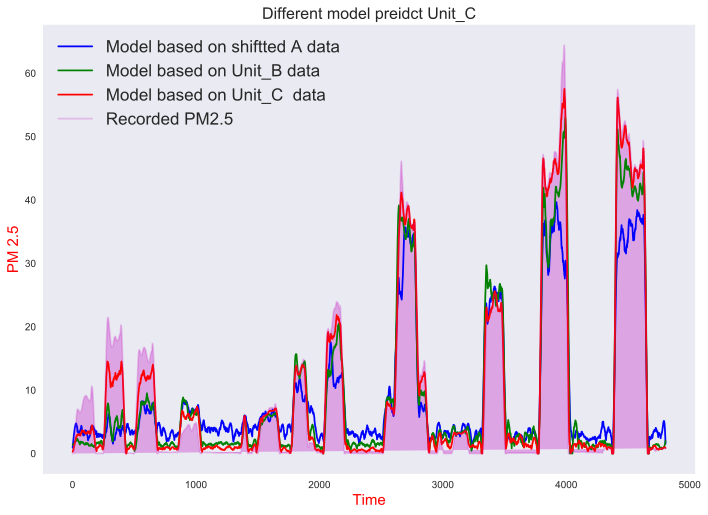

In [13]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(c['Number'],apc, 'b-',label='Model based on shiftted A data')
ax1.plot(c['Number'],bpc, 'g-',label='Model based on Unit_B data')
ax1.plot(c['Number'],cpc, 'r-',label='Model based on Unit_C  data')
ax1.plot(c['Number'],yc, 'm-',alpha=0.2,label='Recorded PM2.5')
ax1.fill(c['Number'], yc, 'm', alpha=0.3)
#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Different model preidct Unit_C',fontsize=16)

Text(0.5,1,'Unit_A Compare to Recorded PM2.5')

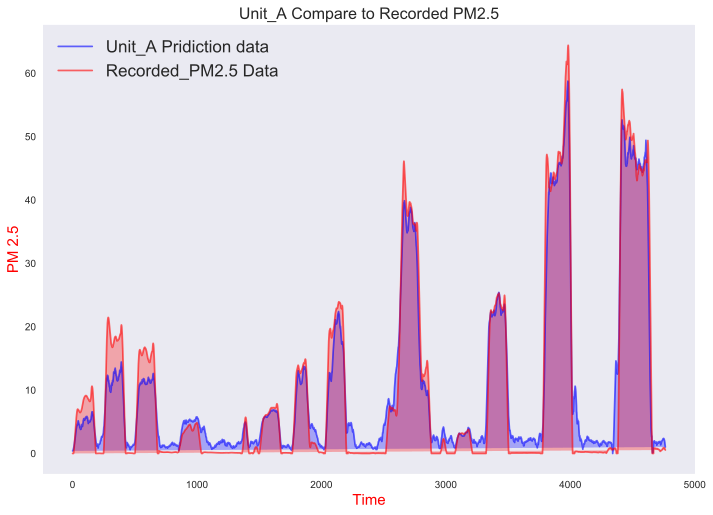

In [14]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(a['Number'],apa, 'b-',label='Unit_A Pridiction data', alpha=0.6)
ax1.plot(a['Number'],ya, 'r-',label='Recorded_PM2.5 Data', alpha=0.6)

#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)
ax1.fill(a['Number'], apa, 'b', a['Number'], ya, 'r', alpha=0.3)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Unit_A Compare to Recorded PM2.5',fontsize=16)

Text(0.5,1,'Unit_B Compare to Recorded PM2.5')

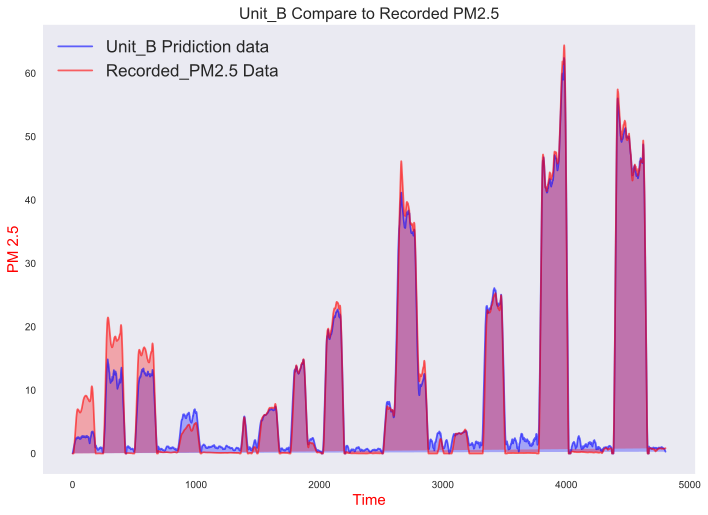

In [15]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(b['Number'],bpb, 'b-',label='Unit_B Pridiction data',alpha=0.6)
ax1.plot(b['Number'],yb, 'r-',label='Recorded_PM2.5 Data',alpha=0.6)

#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)
ax1.fill(b['Number'], bpb, 'b', b['Number'], yb, 'r', alpha=0.3)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Unit_B Compare to Recorded PM2.5',fontsize=16)

Text(0.5,1,'Unit_C Compare to Recorded PM2.5')

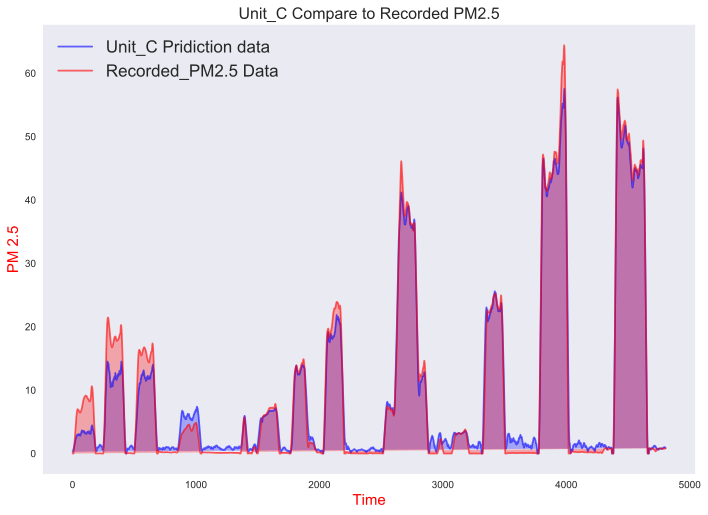

In [16]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#ax2 = ax1.twinx()
ax1.plot(c['Number'],cpc, 'b-',label='Unit_C Pridiction data',alpha=0.6)
ax1.plot(c['Number'],yc, 'r-',label='Recorded_PM2.5 Data',alpha=0.6)

#ax = sns.regplot(x="concentration", y="g_0.3",marker='o',scatter_kws={"s": 8}, color="purple", data=df)
#ax.text(0.5, 0.6, "An annotation", size='large', color='black', weight='semibold',transform=ax.transAxes)
ax1.set_xlabel('Time',fontsize=15,color='r',position=(0.5,1.05))
ax1.set_ylabel('Pridict',fontsize=15,color='r',position=(0.5,0.5))
ax1.grid(False)
ax1.grid(False)

ax1.fill(c['Number'], cpc, 'b', c['Number'], yc, 'r', alpha=0.3)
ax1.legend(loc='best',fontsize=17)
ax1.set_ylabel('PM 2.5',fontsize=15,color='r',position=(0.5,0.5))
ax1.set_title('Unit_C Compare to Recorded PM2.5',fontsize=16)

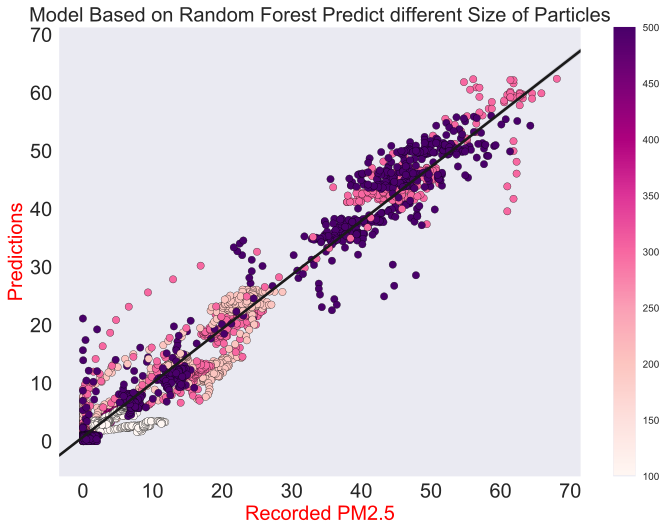

In [24]:
fig, s = plt.subplots()
fig.set_size_inches(11.7, 8.27)

b['p']=bpb
points = plt.scatter(b["PM"], b["p"],
                     s=55, c=b["Size"], cmap="RdPu",marker='o',edgecolors='k')
plt.colorbar(points)

s=sns.regplot("PM", "p", data=b, scatter=False, color=".1")
s.grid(False)

s.set_xlabel('Recorded PM2.5',fontsize=15,color='r',position=(0.5,0.5))
s.set_ylabel('Predictions',fontsize=15,color='r',position=(0.5,0.5))
s.set_title('Model Based on Random Forest Predict different Size of Particles',fontsize=16)
plt.savefig("1.png", dpi = 900)


for item in ([s.title, s.xaxis.label, s.yaxis.label] +
              s.get_xticklabels() + s.get_yticklabels()):
    item.set_fontsize(20)

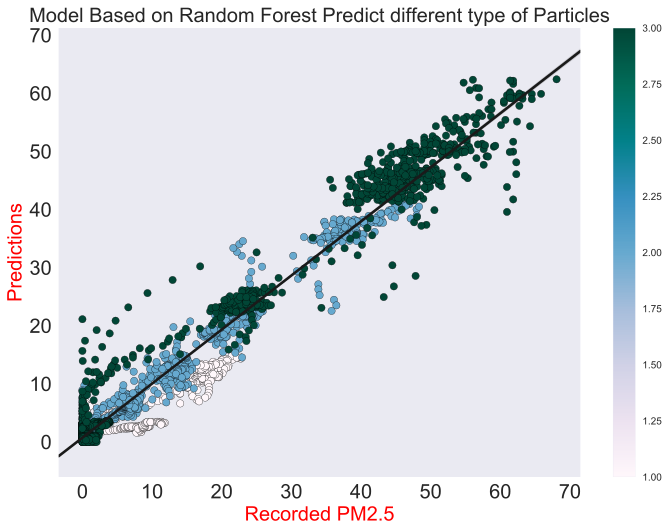

In [25]:
fig, s = plt.subplots()
fig.set_size_inches(11.7, 8.27)

b['p']=bpb
points = plt.scatter(b["PM"], b["p"],
                     s=55, c=b["Particle Shape"], cmap="PuBuGn",marker='o',edgecolors='k')
plt.colorbar(points)


s=sns.regplot("PM", "p", data=b, scatter=False, color=".1")
s.grid(False)



s.set_xlabel('Recorded PM2.5',fontsize=15,color='r',position=(0.5,0.5))
s.set_ylabel('Predictions',fontsize=15,color='r',position=(0.5,0.5))
s.set_title('Model Based on Random Forest Predict different type of Particles',fontsize=16)
plt.savefig("2.png", dpi = 900)

for item in ([s.title, s.xaxis.label, s.yaxis.label] +
              s.get_xticklabels() + s.get_yticklabels()):
    item.set_fontsize(20)

In [26]:
b.to_csv('unitB.csv')